In [ ]:
import pandas as pd
import seaborn as sns

In [ ]:
!ls

sample_data


# Load Data

In [ ]:
!wget http://nanostring-public-share.s3-website-us-west-2.amazonaws.com/GeoScriptHub/KidneyDataset/Kidney_Sample_Annotations.txt

--2021-04-02 13:57:53--  http://nanostring-public-share.s3-website-us-west-2.amazonaws.com/GeoScriptHub/KidneyDataset/Kidney_Sample_Annotations.txt
Resolving nanostring-public-share.s3-website-us-west-2.amazonaws.com (nanostring-public-share.s3-website-us-west-2.amazonaws.com)... 52.218.234.242
Connecting to nanostring-public-share.s3-website-us-west-2.amazonaws.com (nanostring-public-share.s3-website-us-west-2.amazonaws.com)|52.218.234.242|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 56233 (55K) [text/plain]
Saving to: ‘Kidney_Sample_Annotations.txt’

Kidney_Sample_Annot 100%[===================>]  54.92K  --.-KB/s    in 0.03s   

2021-04-02 13:57:53 (1.97 MB/s) - ‘Kidney_Sample_Annotations.txt’ saved [56233/56233]



In [ ]:
!wget http://nanostring-public-share.s3-website-us-west-2.amazonaws.com/GeoScriptHub/KidneyDataset/Kidney_Feature_Annotations.txt

--2021-04-02 13:57:55--  http://nanostring-public-share.s3-website-us-west-2.amazonaws.com/GeoScriptHub/KidneyDataset/Kidney_Feature_Annotations.txt
Resolving nanostring-public-share.s3-website-us-west-2.amazonaws.com (nanostring-public-share.s3-website-us-west-2.amazonaws.com)... 52.218.234.242
Connecting to nanostring-public-share.s3-website-us-west-2.amazonaws.com (nanostring-public-share.s3-website-us-west-2.amazonaws.com)|52.218.234.242|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 567470 (554K) [text/plain]
Saving to: ‘Kidney_Feature_Annotations.txt’

Kidney_Feature_Anno 100%[===================>] 554.17K  --.-KB/s    in 0.09s   

2021-04-02 13:57:55 (6.35 MB/s) - ‘Kidney_Feature_Annotations.txt’ saved [567470/567470]



In [ ]:
!wget http://nanostring-public-share.s3-website-us-west-2.amazonaws.com/GeoScriptHub/KidneyDataset/Kidney_Q3Norm_TargetCountMatrix.txt

--2021-04-02 13:59:18--  http://nanostring-public-share.s3-website-us-west-2.amazonaws.com/GeoScriptHub/KidneyDataset/Kidney_Q3Norm_TargetCountMatrix.txt
Resolving nanostring-public-share.s3-website-us-west-2.amazonaws.com (nanostring-public-share.s3-website-us-west-2.amazonaws.com)... 52.218.204.115
Connecting to nanostring-public-share.s3-website-us-west-2.amazonaws.com (nanostring-public-share.s3-website-us-west-2.amazonaws.com)|52.218.204.115|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 44318581 (42M) [text/plain]
Saving to: ‘Kidney_Q3Norm_TargetCountMatrix.txt’

Kidney_Q3Norm_Targe 100%[===================>]  42.26M  43.8MB/s    in 1.0s    

2021-04-02 13:59:19 (43.8 MB/s) - ‘Kidney_Q3Norm_TargetCountMatrix.txt’ saved [44318581/44318581]



In [ ]:
#ROIS annotations
rois_df = pd.read_csv("Kidney_Sample_Annotations.txt",sep='\t')
rois_df = rois_df.loc[:,'SlideName':'NormalizationFactor']

#Gene-ProbeId
gene_probe_df = pd.read_csv("Kidney_Feature_Annotations.txt",sep='\t')
#Gene count per AOI
gene_norm_count_df = pd.read_csv("Kidney_Q3Norm_TargetCountMatrix.txt",sep='\t')

In [ ]:
rois_df.head()

,SlideName,ScanName,ROILabel,SegmentLabel,SegmentDisplayName,Sample_ID,AOISurfaceArea,AOINucleiCount,ROICoordinateX,ROICoordinateY,RawReads,TrimmedReads,StitchedReads,AlignedReads,DeduplicatedReads,SequencingSaturation,UMIQ30,RTSQ30,disease_status,pathology,region,LOQ,NormalizationFactor
0,disease3,disease3_scan,7,Geometric Segment,disease3_scan | 007 | Geometric Segment,DSP-1001250007851-H-A02,31797.59253,202,11444,-18819,5521543,5471679,5426943,5182304,519757,90.586744,0.9939,0.9932,DKD,abnormal,glomerulus,24.246524,0.556033
1,disease3,disease3_scan,8,Geometric Segment,disease3_scan | 008 | Geometric Segment,DSP-1001250007851-H-A03,16920.10267,102,13064,-20021,3688649,3661664,3634011,3470622,342783,90.707085,0.9948,0.9942,DKD,abnormal,glomerulus,19.338643,0.820810
2,disease3,disease3_scan,9,Geometric Segment,disease3_scan | 009 | Geometric Segment,DSP-1001250007851-H-A04,14312.32987,98,14221,-18591,2470587,2452568,2432975,2325816,299883,87.861873,0.9949,0.9943,DKD,abnormal,glomerulus,17.017533,0.957612
3,disease3,disease3_scan,10,Geometric Segment,disease3_scan | 010 | Geometric Segment,DSP-1001250007851-H-A05,20032.83995,143,12120,-17683,3703066,3654886,3618022,3459194,392537,89.399676,0.9925,0.9909,DKD,abnormal,glomerulus,22.335012,0.718209
4,disease3,disease3_scan,11,Geometric Segment,disease3_scan | 011 | Geometric Segment,DSP-1001250007851-H-A06,27583.26127,195,12816,-16378,5916477,5856159,5802764,5548026,594119,89.958230,0.9934,0.9923,DKD,abnormal,glomerulus,24.703838,0.492486


In [ ]:
rois_df.describe()

,ROILabel,AOISurfaceArea,AOINucleiCount,ROICoordinateX,ROICoordinateY,RawReads,TrimmedReads,StitchedReads,AlignedReads,DeduplicatedReads,SequencingSaturation,UMIQ30,RTSQ30,LOQ,NormalizationFactor
count,231.000000,231.000000,231.000000,231.000000,231.000000,2.310000e+02,2.310000e+02,2.310000e+02,2.310000e+02,2.310000e+02,231.000000,231.000000,231.000000,231.000000,231.000000
mean,18.047619,37456.281731,187.528139,22698.329004,-30539.277056,4.751808e+06,4.699839e+06,4.654379e+06,4.402692e+06,3.799708e+05,90.950892,0.993123,0.992163,20.245172,1.349627
std,14.159415,34432.109233,119.555437,8412.565164,11833.393617,4.027251e+06,3.970015e+06,3.922812e+06,3.719127e+06,3.075198e+05,4.034124,0.002661,0.003162,13.375452,1.386447
min,1.000000,6364.159453,38.000000,3560.000000,-57474.000000,6.941210e+05,6.887780e+05,6.837520e+05,6.535380e+05,1.982700e+04,73.593365,0.982500,0.978800,2.288875,0.162613
25%,7.500000,19076.167065,118.000000,17146.500000,-38275.000000,2.469886e+06,2.446380e+06,2.420140e+06,2.296948e+06,2.118415e+05,88.583000,0.993600,0.992800,13.129534,0.676221
50%,14.000000,24168.739530,152.000000,23829.000000,-31068.000000,3.411689e+06,3.382824e+06,3.357777e+06,3.161068e+06,2.867850e+05,90.994233,0.994100,0.993400,16.575505,1.013942
75%,24.000000,35215.671130,200.500000,28852.000000,-21063.500000,5.553742e+06,5.480556e+06,5.417424e+06,5.148140e+06,4.309720e+05,92.417793,0.994500,0.993800,22.122765,1.325924
max,54.000000,209925.629600,758.000000,39657.000000,-5358.000000,3.170848e+07,3.107060e+07,3.053545e+07,2.925880e+07,1.935040e+06,99.250303,0.995000,0.994300,78.449810,8.618505


# Visualization

# rois_df visualize : kidney sample annotation

In [ ]:
rois_df.shape

(231, 23)

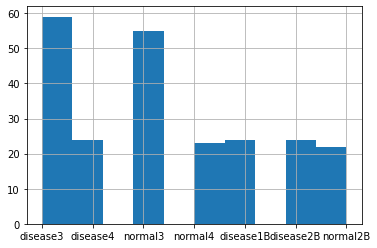

In [ ]:
rois_df['SlideName'].hist()

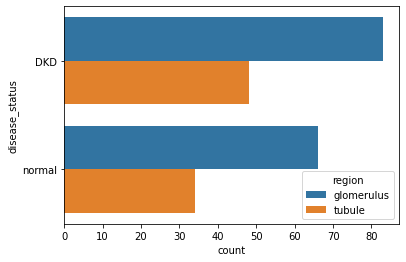

In [ ]:
sns.countplot(data = rois_df, y = "disease_status", hue = "region")

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 66.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 39.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


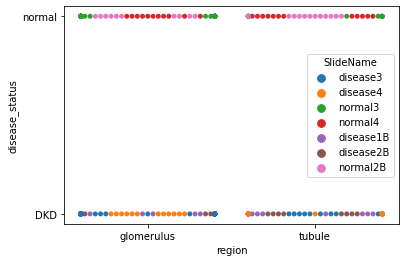

In [ ]:
sns.swarmplot(data = rois_df, x='region', y = "disease_status", hue = "SlideName")

In [ ]:
dkd = rois_df[rois_df['disease_status']=='DKD']

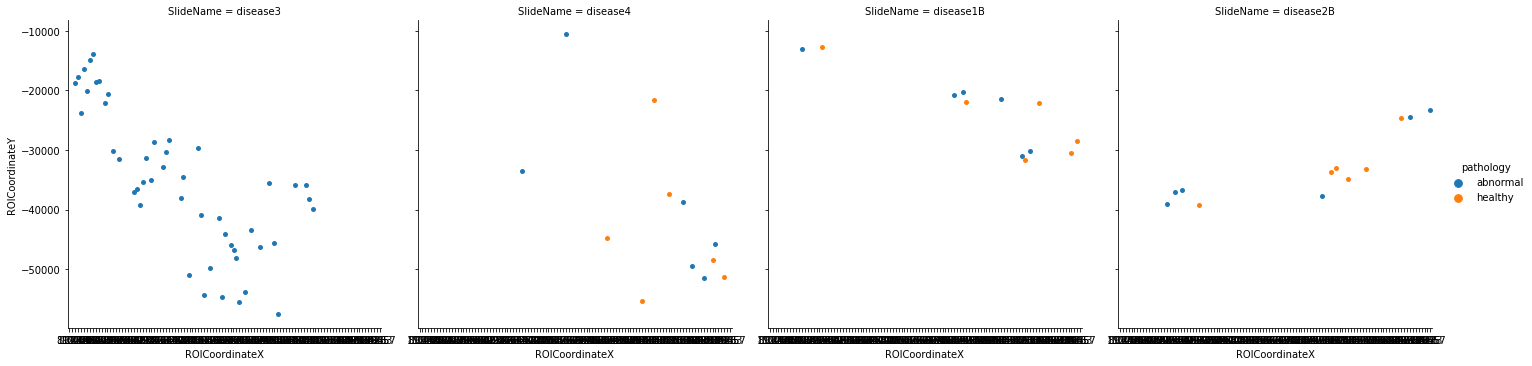

In [ ]:
sns.catplot(x="ROICoordinateX", y="ROICoordinateY",
                col="SlideName", hue="pathology", 
                data=dkd, kind="strip") 

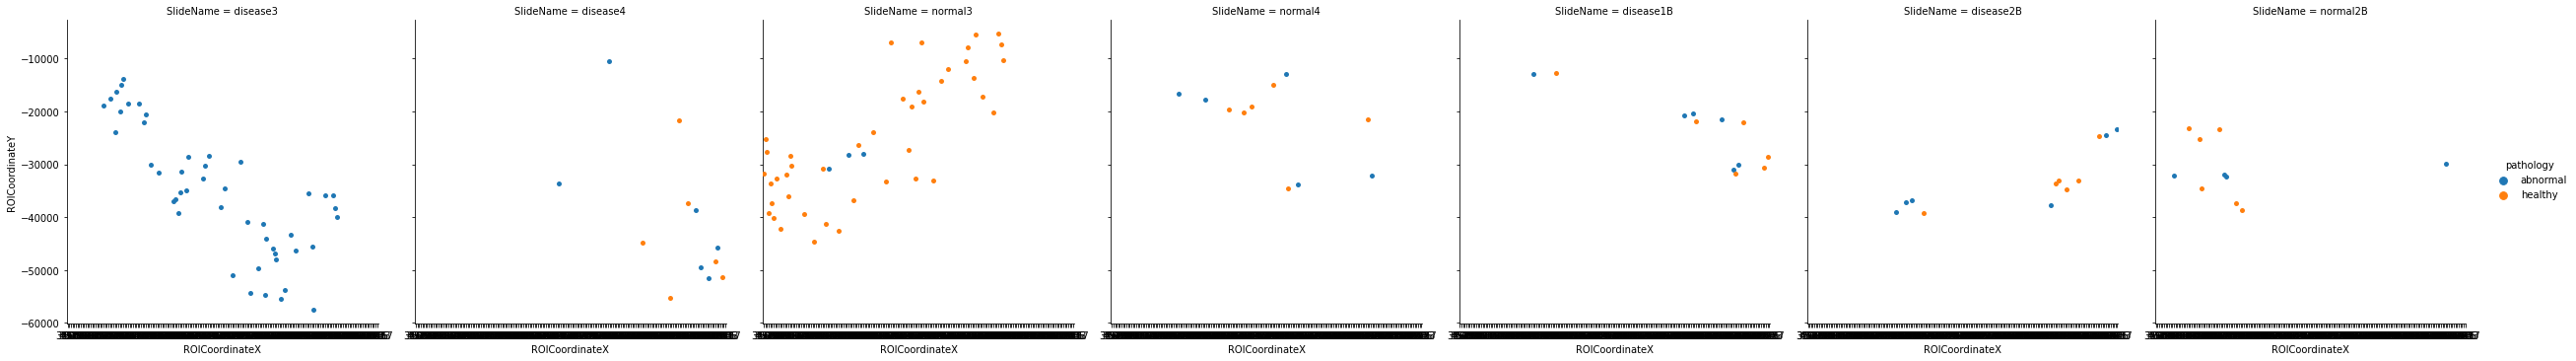

In [ ]:
sns.catplot(x="ROICoordinateX", y="ROICoordinateY",
                col="SlideName", hue="pathology", 
                data=rois_df, kind="strip") 

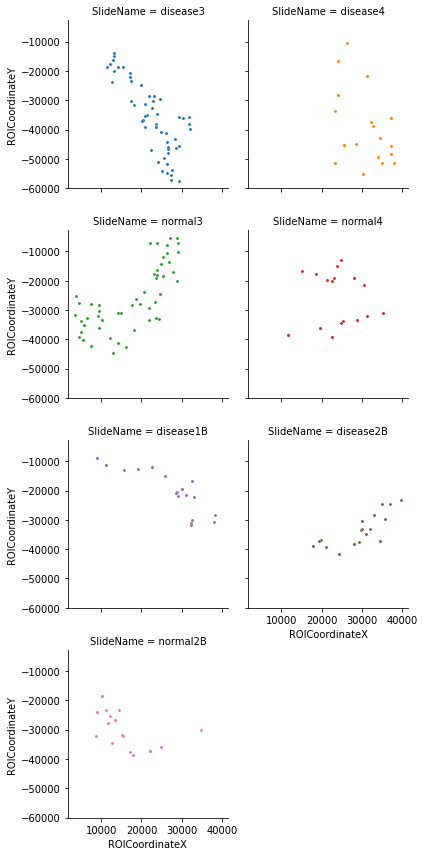

In [ ]:
#Checking neighbor rois mean distance
g = sns.FacetGrid(rois_df, col="SlideName",col_wrap=2,hue="SlideName")
g.map(sns.scatterplot, "ROICoordinateX", "ROICoordinateY",s=10)

In [ ]:
#Checking neighbor rois mean distance
g = sns.FacetGrid(rois_df, col="SlideName",col_wrap=2,hue="SlideName")
g.map(sns.scatterplot, "ROICoordinateX", "ROICoordinateY",s=10)

In [ ]:
rois_df.groupby("SlideName").describe().loc[:,"ROICoordinateX":"ROICoordinateY"]

ROICoordinateX                             ... ROICoordinateY                   
                   count          mean          std  ...            50%       75%      max
SlideName                                            ...                                  
disease1B           24.0  25889.458333  8916.974370  ...       -18041.5 -12521.00  -8961.0
disease2B           24.0  29690.208333  5940.893938  ...       -34206.0 -29674.00 -23312.0
disease3            59.0  22589.271186  5546.747910  ...       -36591.0 -26543.00 -13878.0
disease4            24.0  30156.333333  5507.203146  ...       -42808.0 -32217.00 -10603.0
normal2B            22.0  15568.545455  6573.907258  ...       -28834.5 -24179.75 -18367.0
normal3             55.0  17416.745455  8511.142460  ...       -27983.0 -17849.00  -5358.0
normal4             23.0  24019.739130  6358.595065  ...       -30990.0 -19095.50 -12850.0

[7 rows x 16 columns]

# kidney feature annotation visualization

In [ ]:
gene_probe_df.shape

(18642, 4)

In [ ]:
gene_probe_df.head()

,RTS_ID,TargetName,ProbeID,Negative
0,RTS0020877,A2M,35614,False
1,RTS0020878,NAT2,35615,False
2,RTS0020879,ACADM,35616,False
3,RTS0020880,ACADS,35617,False
4,RTS0020881,ACAT1,35618,False


In [ ]:
gene_probe_df.groupby('ProbeID').describe()

RTS_ID                          ... Negative                   
         count unique         top freq  ...    count unique    top freq
ProbeID                                 ...                            
48           1      1  RTS0029340    1  ...        1      1  False    1
139          1      1  RTS0051997    1  ...        1      1  False    1
148          1      1  RTS0051998    1  ...        1      1  False    1
153          1      1  RTS0051999    1  ...        1      1  False    1
158          1      1  RTS0052000    1  ...        1      1  False    1
...        ...    ...         ...  ...  ...      ...    ...    ...  ...
51880        1      1  RTS0039017    1  ...        1      1  False    1
51881        1      1  RTS0039018    1  ...        1      1  False    1
51882        1      1  RTS0039020    1  ...        1      1  False    1
51883        1      1  RTS0039021    1  ...        1      1  False    1
51884        1      1  RTS0039022    1  ...        1      1  False    1

[18642 rows x 12 columns]

In [ ]:
gene_norm_count_df.head()

,TargetName,disease3_scan | 001 | PanCK,disease3_scan | 001 | neg,disease3_scan | 002 | PanCK,disease3_scan | 002 | neg,disease3_scan | 003 | PanCK,disease3_scan | 003 | neg,disease3_scan | 004 | PanCK,disease3_scan | 004 | neg,disease3_scan | 005 | PanCK,disease3_scan | 005 | neg,disease3_scan | 006 | PanCK,disease3_scan | 006 | neg,disease3_scan | 007 | Geometric Segment,disease3_scan | 008 | Geometric Segment,disease3_scan | 009 | Geometric Segment,disease3_scan | 010 | Geometric Segment,disease3_scan | 011 | Geometric Segment,disease3_scan | 012 | Geometric Segment,disease3_scan | 013 | Geometric Segment,disease3_scan | 014 | Geometric Segment,disease3_scan | 015 | Geometric Segment,disease3_scan | 016 | Geometric Segment,disease3_scan | 017 | Geometric Segment,disease3_scan | 018 | Geometric Segment,disease3_scan | 019 | Geometric Segment,disease3_scan | 020 | Geometric Segment,disease3_scan | 021 | Geometric Segment,disease3_scan | 022 | Geometric Segment,disease3_scan | 023 | Geometric Segment,disease3_scan | 024 | Geometric Segment,disease3_scan | 025 | Geometric Segment,disease3_scan | 026 | Geometric Segment,disease3_scan | 027 | Geometric Segment,disease3_scan | 028 | Geometric Segment,disease3_scan | 029 | Geometric Segment,disease3_scan | 030 | Geometric Segment,disease3_scan | 031 | Geometric Segment,disease3_scan | 032 | Geometric Segment,disease3_scan | 033 | Geometric Segment,...,normal2B_scan | 010 | PanCK,normal2B_scan | 010 | neg,normal2B_scan | 011 | PanCK,normal2B_scan | 011 | neg,normal2B_scan | 012 | PanCK,normal2B_scan | 012 | neg,normal2B_scan | 013 | Geometric Segment,normal2B_scan | 014 | Geometric Segment,normal2B_scan | 015 | Geometric Segment,normal2B_scan | 016 | Geometric Segment,normal2B_scan | 017 | Geometric Segment,normal2B_scan | 018 | Geometric Segment,normal2B_scan | 019 | Geometric Segment,normal2B_scan | 020 | Geometric Segment,normal2B_scan | 021 | Geometric Segment,normal2B_scan | 022 | Geometric Segment,disease1B_scan | 007 | PanCK,disease1B_scan | 007 | neg,disease1B_scan | 008 | PanCK,disease1B_scan | 008 | neg,disease1B_scan | 009 | PanCK,disease1B_scan | 009 | neg,disease1B_scan | 010 | PanCK,disease1B_scan | 010 | neg,disease1B_scan | 011 | PanCK,disease1B_scan | 011 | neg,disease1B_scan | 012 | PanCK,disease1B_scan | 012 | neg,disease1B_scan | 013 | Geometric Segment,disease1B_scan | 014 | Geometric Segment,disease1B_scan | 015 | Geometric Segment,disease1B_scan | 016 | Geometric Segment,disease1B_scan | 017 | Geometric Segment,disease1B_scan | 018 | Geometric Segment,disease1B_scan | 019 | Geometric Segment,disease1B_scan | 020 | Geometric Segment,disease1B_scan | 021 | Geometric Segment,disease1B_scan | 022 | Geometric Segment,disease1B_scan | 023 | Geometric Segment,disease1B_scan | 024 | Geometric Segment
0,PADI2,6.012910,8.618505,11.708157,8.314322,5.171103,12.264795,9.049430,8.618505,5.612050,8.759792,11.153359,13.100127,5.560326,4.104050,7.660893,8.618505,5.417346,5.386565,9.157161,10.139417,7.584284,8.340488,7.097592,9.979321,7.097592,9.695818,4.104050,9.576116,10.533728,10.342206,6.083650,13.608165,6.350477,13.132960,5.303695,6.463879,5.386565,7.387290,6.894804,...,4.309252,3.372458,3.977771,9.776214,4.309252,10.290752,8.043938,8.043938,6.629619,4.055767,6.083650,5.069709,7.541192,11.491340,12.312150,5.171103,5.745670,9.336713,5.745670,13.406563,10.139417,8.226755,9.072110,8.461805,7.387290,7.494352,8.618505,7.726935,2.872835,9.849720,5.745670,5.745670,17.237009,5.745670,8.618505,5.745670,4.309252,17.237009,8.618505,8.618505
1,CYP24A1,9.219796,7.879776,7.480212,8.314322,1.723701,9.944429,7.325729,7.453842,6.814632,5.934052,4.055767,6.205323,5.560326,6.566480,6.703281,7.182087,3.447402,6.463879,3.231939,7.097592,4.136882,8.896521,5.069709,2.721633,5.069709,4.309252,10.670530,5.745670,3.830447,6.894804,6.083650,4.536055,5.443266,6.566480,5.303695,8.618505,6.463879,6.156075,3.447402,...,5.745670,22.108338,13.259238,33.959481,7.541192,50.939222,5.745670,10.342206,15.91108